# Transfer Value Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
player_stats=pd.read_csv('player_stats.csv')
player_wages=pd.read_csv('player_wages.csv')

In [3]:
player_stats.columns

Index(['Rank', 'Player', 'Nationality', 'Position', 'Club', 'Age', 'BirthYear',
       'MatchesPlayed', 'MatchesStarted', 'MinutesPlayed', 'MatchesPlayed_90s',
       'Goals_Total', 'Assists_Total', 'GoalsPlusAssists', 'NonPenaltyGoals',
       'PenaltyGoals', 'PenaltyAttempts', 'YellowCards', 'RedCards',
       'xG_Total', 'NonPenalty_xG', 'xAG_Total', 'NonPenalty_xG_plus_xAG',
       'ProgressiveCarries', 'ProgressivePasses', 'ProgressivePassesReceived',
       'Goals_Total_per90', 'Assists_Total_per90', 'GoalsPlusAssists_per90',
       'NonPenaltyGoals_per90', 'G+A_ExclPK', 'xG_Total_per90',
       'xAG_Total_per90', 'xG_plus_xAG', 'NonPenalty_xG_per90',
       'NonPenalty_xG_plus_xAG_per90'],
      dtype='object')

In [4]:
player_wages.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age',
       'Annual Wages in pounds', 'Weekly Wages in pounds'],
      dtype='object')

# Remove commas and convert to float
player_wages['Annual Wages in pounds'] = (
    player_wages['Annual Wages in pounds'].str.replace(',', '').astype(float)
)

player_wages['Weekly Wages in pounds'] = (
    player_wages['Weekly Wages in pounds'].str.replace(',', '').astype(float)

### Merge Datasets

In [13]:
# Ensure both have stripped player names (sometimes extra spaces or accents can interfere)
player_stats['Player'] = player_stats['Player'].str.strip()
player_wages['Player'] = player_wages['Player'].str.strip()

# Merge on Player name
merged_df = pd.merge(player_stats, player_wages, on='Player', how='inner')

In [14]:
merged_df.dtypes

Rank                              int64
Player                           object
Nationality                      object
Position                         object
Club                             object
Age_x                           float64
BirthYear                       float64
MatchesPlayed                     int64
MatchesStarted                    int64
MinutesPlayed                     int64
MatchesPlayed_90s               float64
Goals_Total                       int64
Assists_Total                     int64
GoalsPlusAssists                  int64
NonPenaltyGoals                   int64
PenaltyGoals                      int64
PenaltyAttempts                   int64
YellowCards                       int64
RedCards                          int64
xG_Total                        float64
NonPenalty_xG                   float64
xAG_Total                       float64
NonPenalty_xG_plus_xAG          float64
ProgressiveCarries                int64
ProgressivePasses                 int64


In [15]:
# Drop unnecessary columns if needed
merged_df.drop(['Rk', 'Nation', 'Squad'], axis=1, inplace=True, errors='ignore')

# Check for missing values
merged_df.isnull().sum()

# Handle missing values
merged_df = merged_df.dropna()  # Or use imputation if needed

In [16]:
# Convert wages to numeric (remove commas/£ signs if needed)
merged_df['Weekly Wages in pounds'] = (
    merged_df['Weekly Wages in pounds'].replace('[£,]', '', regex=True).astype(float)
)

# Encode categorical columns if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['Position'] = le.fit_transform(merged_df['Position'])  

In [19]:
merged_df

,Rank,Player,Nationality,Position,Club,Age_x,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,...,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90,Pos,Age_y,Annual Wages in pounds,Weekly Wages in pounds
0,1,Max Aarons,ENG,0,Bournemouth,25.0,2000.0,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,DF,24,1820000.0,35000.0
1,3,Tyler Adams,USA,7,Bournemouth,26.0,1999.0,21,14,1380,...,0.20,0.08,0.05,0.13,0.08,0.13,MF,25,3120000.0,60000.0
2,4,Tosin Adarabioyo,ENG,0,Chelsea,27.0,1997.0,18,12,1182,...,0.15,0.07,0.02,0.09,0.07,0.09,DF,26,6240000.0,120000.0
3,5,Simon Adingra,CIV,5,Brighton,23.0,2002.0,22,7,743,...,0.36,0.19,0.17,0.36,0.19,0.36,"FW,MF",22,650000.0,12500.0
4,6,Emmanuel Agbadou,CIV,0,Wolves,27.0,1997.0,9,9,780,...,0.00,0.02,0.01,0.03,0.02,0.03,DF,27,2340000.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,554,Leny Yoro,FRA,0,Manchester Utd,19.0,2005.0,16,9,877,...,0.00,0.07,0.00,0.07,0.07,0.07,CB,18,5980000.0,115000.0
515,555,Ashley Young,ENG,1,Everton,39.0,1985.0,27,17,1586,...,0.23,0.02,0.09,0.10,0.02,0.10,"DF,FW",39,2080000.0,40000.0
516,557,Oleksandr Zinchenko,UKR,2,Arsenal,28.0,1996.0,10,2,299,...,0.00,0.05,0.01,0.05,0.05,0.05,"DF,MF",27,7800000.0,150000.0
517,558,Joshua Zirkzee,NED,5,Manchester Utd,23.0,2001.0,31,13,1348,...,0.27,0.31,0.10,0.41,0.31,0.41,"FW,MF",23,5460000.0,105000.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select features
X = merged_df[['Goals_Total', 'Assists_Total', 'xG_Total', 'xAG_Total',
    'ProgressiveCarries', 'ProgressivePasses', 'NonPenaltyGoals',
    'MinutesPlayed', 'Age_x', 'Position']]
y = merged_df['Weekly Wages in pounds']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print(f"RMSE: {mse**0.5:.2f}")


RMSE: 41363.31


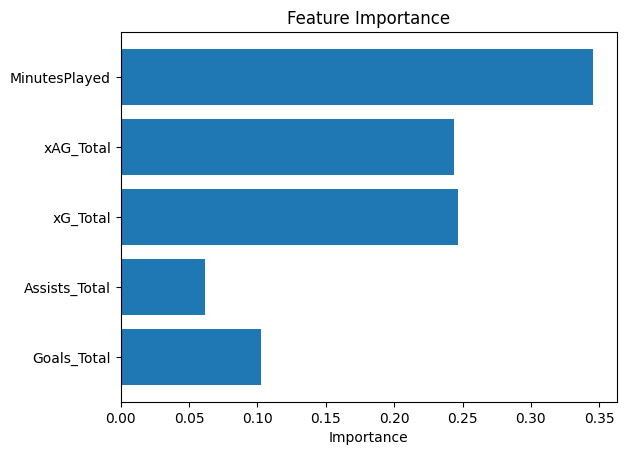

In [18]:
import matplotlib.pyplot as plt

feat_importances = model.feature_importances_
features = X.columns

plt.barh(features, feat_importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()